In [3]:
from BlackBoxOptimizer import Optimizer, EvolutionaryOpt, SimulatedAnnealingOptimizer, GaussOpt, Genetic_Algo
from Models import SquareSumModel, SinParabolaModel

from typing import List

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import statistics
from math import sqrt
import math

In [51]:
class OptimizationModel:
    def __init__(self, a=1.0):
        self.a = a

        self.curr_mv1=14.1
        self.curr_mv2=15.7
        self.curr_mv3=34.7
        self.curr_mv4=98.7
        self.curr_mv5=0.93
        self.curr_mv6=0.43

        self.curr_cv1=13.5
        self.curr_cv2=14.1
        self.curr_cv3=83.5
        self.curr_cv4=90.3
        self.curr_cv5=15.7
        self.curr_cv6=100
        self.curr_cv7=30.5
        self.curr_cv8=34.7
        self.curr_cv9=1.145
        self.curr_cv10=0.95
        self.curr_cv11=20
        self.curr_cv12=95
        self.curr_cv13=61.1


    def evaluate(self, mv_values: List[float]) -> float:
        # Минимум: x1=2, x2=-3, x3=4, x4=1, значение 0
        x1, x2, x3, x4, x5, x6 = mv_values
        target_func=(-50000*x5-35000*x6)
        additional_cv = [
            self.curr_cv1+0.964*(x1-self.curr_mv1),  # CV1 (индекс 1)
            self.curr_cv2+1*(x1-self.curr_mv1),   # CV2 (индекс 2)
            self.curr_cv3+1.4*(x1-self.curr_mv1), # CV3 (индекс 3)
            self.curr_cv4-0.4*(x1-self.curr_mv1), # CV4 (индекс 4)
            self.curr_cv5+1*(x2-self.curr_mv2),   # CV5 (индекс 5)
            self.curr_cv6-0.5*(x2-self.curr_mv2)+0.5*(x3-self.curr_mv3),               # CV6 (индекс 6)
            self.curr_cv7+0.88*(x3-self.curr_mv3)-2.65*(x4-self.curr_mv4),              # CV7 (индекс 7)
            self.curr_cv8+1*(x3-self.curr_mv3),               # CV8 (индекс 8)
            self.curr_cv9+0.033*(x3-self.curr_mv3)+0.01*(x4-self.curr_mv4),       # CV9 (индекс 9)
            self.curr_cv10-0.0218*(x1-self.curr_mv1)-0.015*(x2-self.curr_mv2)+0.0288*(x3-self.curr_mv3)+0.109*(x4-self.curr_mv4)+0.0655*(x5-self.curr_mv5)-0.0218*(x6-self.curr_mv6),             # CV10 (индекс 10)
            self.curr_cv11-0.546*(x1-self.curr_mv1)-0.382*(x2-self.curr_mv2)+0.721*(x3-self.curr_mv3)+0.719*(x4-self.curr_mv4)+0.764*(x5-self.curr_mv5)-0.546*(x6-self.curr_mv6),                # CV11 (индекс 11)
            self.curr_cv12-0.109*(x1-self.curr_mv1)-0.546*(x2-self.curr_mv2)+0.0546*(x3-self.curr_mv3)+0.625*(x4-self.curr_mv4)+0.371*(x5-self.curr_mv5)-0.109*(x6-self.curr_mv6),        # CV12 (индекс 12)
            self.curr_cv13+0.962*(x1-self.curr_mv1)+1*(x2-self.curr_mv2)+0.88*(x3-self.curr_mv3)         # CV13 (индекс 13)
        ]
        return [target_func]+additional_cv

cvs = [
            {
                "Id": "36127bf6-bf83-45c0-a4e1-65d2a1c20c22",
                "Name": "Target Function",
                "DataType": "Numeric",
                "LowerBound": -np.inf,
                "UpperBound": np.inf
            },
            {
                "Id": "cv1", "Name": "Y1", "DataType": "Numeric", "LowerBound": 9,"UpperBound": 16.5
            },
            {
                "Id": "cv2", "Name": "Y2", "DataType": "Numeric", "LowerBound": 9.4,"UpperBound": 17.2
            },
            {
                "Id": "cv3", "Name": "Y3", "DataType": "Numeric", "LowerBound": 81.5,"UpperBound": 88.5
            },
            {
                "Id": "cv4", "Name": "Y4", "DataType": "Numeric", "LowerBound": 89,"UpperBound": 91
            },
            {
                "Id": "cv5", "Name": "Y5", "DataType": "Numeric", "LowerBound": 12.3,"UpperBound": 22.6
            },
            {
                "Id": "cv6", "Name": "Y6", "DataType": "Numeric", "LowerBound": 85,"UpperBound": 140
            },
            {
                "Id": "cv7", "Name": "Y7", "DataType": "Numeric", "LowerBound": 19.6,"UpperBound": 36
            },
            {
                "Id": "cv8", "Name": "Y8", "DataType": "Numeric", "LowerBound": 28,"UpperBound": 40
            },
            {
                "Id": "cv9", "Name": "Y9", "DataType": "Numeric", "LowerBound": 0.28,"UpperBound": 1.16
            },
            {
                "Id": "cv10", "Name": "Y10", "DataType": "Numeric", "LowerBound": 0.85,"UpperBound": 1
            },
            {
                "Id": "cv11", "Name": "Y11", "DataType": "Numeric", "LowerBound": 10,"UpperBound": 25
            },
            {
                "Id": "cv12", "Name": "Y12", "DataType": "Numeric", "LowerBound": 95,"UpperBound": 99
            },
            {
                "Id": "cv13", "Name": "Y13", "DataType": "Numeric", "LowerBound": 33.3,"UpperBound": 59.9
            }
        ]

mvs = [
    {"Id": "mv1", "Name": "X1", "DataType": "Numeric", "LowerBound": 9.4, "UpperBound": 17.2},
    {"Id": "mv2", "Name": "X2", "DataType": "Numeric", "LowerBound": 12.3, "UpperBound": 22.6},
    {"Id": "mv3", "Name": "X3", "DataType": "Numeric", "LowerBound": 28, "UpperBound": 40},
    {"Id": "mv4", "Name": "X4", "DataType": "Numeric", "LowerBound": 94, "UpperBound": 101},
    {"Id": "mv5", "Name": "X5", "DataType": "Numeric", "LowerBound": 0.0000001, "UpperBound": 2.8},
    {"Id": "mv6", "Name": "X6", "DataType": "Numeric", "LowerBound": 0.0000001, "UpperBound": 1.3}
]

In [52]:
# Минимум: x1=2, x2=-3, x3=4, x4=1, значение 0
model = OptimizationModel()
model.evaluate([2.0, -3.0, 4.0, 1.0, 0.0000001, 0.0000001])

[-0.0085,
 1.8356000000000012,
 2.0,
 66.56,
 95.14,
 -3.0,
 94.0,
 262.38899999999995,
 4.0,
 -0.8451000000000002,
 -10.09072099563,
 -59.10673997820001,
 43.4922200262,
 3.7438000000000002]

In [31]:
target = np.array([-0.8, 1.2])
model = SquareSumModel(-target)

model = SinParabolaModel(a = -target, b=2, c=10)

In [30]:
model.evaluate([-0.8, 1.2])

array([4.58])

In [58]:
optimizer = Optimizer(
            optCls=EvolutionaryOpt,
            seed=42,
            to_model_vec_size=6,
            from_model_vec_size=14,
            iter_limit=100,
            external_model=model.evaluate,
            population_size=30,
            offspring_per_parent=5,
            mutation_prob=0.5,
            sigma_init=0.4,
            t_max=100
        )

for i in range(6):  # Первые 3 параметра - непрерывные
    optimizer.setVecItemLimit(i, "to_model", min=mvs[i]['LowerBound'], max=mvs[i]['UpperBound'])

for i in range(14):  # Первые 3 параметра - непрерывные
    optimizer.setVecItemLimit(i+1, "from_model", min=cvs[i]['LowerBound'], max=cvs[i]['UpperBound'])
# optimizer.setVecItemLimit(1, "from_model", min=1, max=np.inf)


optimizer.modelOptimize()
ep_optimizer = optimizer.getOptimizer()
history = ep_optimizer.get_optimization_history()
best_solution = ep_optimizer._to_opt_model_data.vecs[:, 0]

x_hist = np.empty([len(history), 6])
y_hist = np.empty([len(history), 14])
for i, gen in enumerate(history):
    x = gen['best_solution']
    x_hist[i, :] = x
    y_hist[i] = model.evaluate(x)


print(' Итог MV', x_hist[-1])
print(' Итог СV', y_hist[-1])
# print(' Итог L1', np.sum(np.abs(x_hist[-1]-target)))
print(' число обращений к оракулу', optimizer.get_usage_count())

 Итог MV [12.72261336 13.72072213 31.27112694 98.03826615  2.79999     1.29999   ]
 Итог СV [-1.85499150e+05  1.21721993e+01  1.27226134e+01  8.15716587e+01
  9.08509547e+01  1.37207221e+01  9.92752024e+01  2.92361864e+01
  3.12711269e+01  1.02522985e+00  9.42354226e-01  1.95137910e+01
  9.62289581e+01  5.47782679e+01]
 число обращений к оракулу 17970


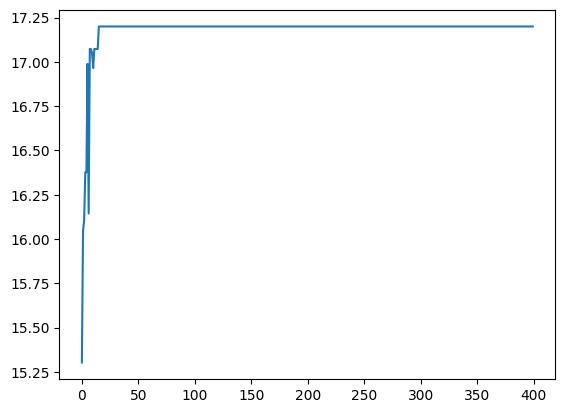

In [46]:
plt.plot(x_hist[:,0])

In [28]:
import warnings

warnings.filterwarnings('ignore')


optimizer = Optimizer(
        optCls              = GaussOpt,
        seed                = 173, # TODO: Проверить, точно ли работает. Сейчас выдаёт разные значения при одном seed
        to_model_vec_size   = 2,
        from_model_vec_size = 1,
        iter_limit          = 100,
        external_model = model.evaluate,
        target = None,
        )
# optimizer.configure(kernel_cfg=('RBF',{}))

for j in range(2):
    optimizer.setVecItemLimit(j, "to_model", -3, 3)
# optimizer.setVecItemLimit(1, "from_model", min=1, max=np.inf)

optimizer.modelOptimize()


currentOptimizer = optimizer.getOptimizer()

x_hist = currentOptimizer.history_to_opt_model_data.copy()

y_hist = np.empty([len(x_hist), 1])
for i, gen in enumerate(x_hist):
    y_hist[i] = model.evaluate(gen).copy()

x = optimizer.getResult()
print(' Итог MV', x)
print(' Итог СV',model.evaluate(x))
print(' Итог L1', np.sum(np.abs(x-target)))
print(' число обращений к оракулу', optimizer.get_usage_count())

 Итог MV [ 0.50354963 -0.47130215]
 Итог СV [0.08388904]
 Итог L1 0.032247482405719785
 число обращений к оракулу 140


In [61]:
optimizer = Optimizer(
        optCls=SimulatedAnnealingOptimizer,
        seed=1424,
        to_model_vec_size=6,
        from_model_vec_size=14,
        iter_limit=300,  # Уменьшил для более компактного вывода
        external_model=model.evaluate,
        initial_temp=50.0,
        min_temp=1e-5,
        cooling_rate=0.98,
        step_size=0.8,
        penalty_coef=1e6  
    )

for i in range(6):  # ограничения на MV
    optimizer.setVecItemLimit(i, "to_model", min=mvs[i]['LowerBound'], max=mvs[i]['UpperBound'])

for i in range(14):  # ограничения на СV
    optimizer.setVecItemLimit(i+1, "from_model", min=cvs[i]['LowerBound'], max=cvs[i]['UpperBound'])

    
# for i in range(2):  # Первые 3 параметра - непрерывные
#     optimizer.setVecItemLimit(i, "to_model", min=-3, max=3)
# optimizer.setVecItemLimit(1, "from_model", min=1, max=np.inf)
optimizer.modelOptimize()

archive_vectors, archive_energies, archive_outputs = optimizer.getOptimizer().get_archive()
y_hist = archive_outputs[:300:5, 0]
x_hist = archive_vectors[:300:5]

x = optimizer.getResult()
print(' Итог MV', x)
print(' Итог СV',model.evaluate(x))
# print(' Итог L1', np.sum(np.abs(x-target)))
print(' число обращений к оракулу', optimizer.get_usage_count())

 Итог MV [13.2269549  13.83415298 28.77512435 97.69464794  2.79999898  1.29999597]
 Итог СV [-185499.80797997897, 12.658384522418027, 13.226954898773887, 82.27773685828345, 90.64921804049044, 13.834152982167897, 97.97048568217289, 27.95029237607517, 28.775124346513696, 0.9394255828646005, 0.820319316392288, 17.14841413042318, 95.76101120181771, 53.18039301972043]
 число обращений к оракулу 900


In [64]:
optimizer = Optimizer(
            optCls=Genetic_Algo,
            seed=111,
            to_model_vec_size=6,
            from_model_vec_size=14,  # SquareSumModel возвращает только ошибку
            iter_limit=100,
            external_model=model.evaluate,  # Используем адаптер
            # Параметры для EvolutionaryOpt
            population_size = 100,
            init_mutation = 0.5,
            min_mutation = 0.05,
            elite_size = 5
        )

# for i in range(2):  # Первые 3 параметра - непрерывные
#     optimizer.setVecItemLimit(i, "to_model", min=-4, max=3)
for i in range(6):  # Первые 3 параметра - непрерывные
    optimizer.setVecItemLimit(i, "to_model", min=mvs[i]['LowerBound'], max=mvs[i]['UpperBound'])

for i in range(14):  # Первые 3 параметра - непрерывные
    optimizer.setVecItemLimit(i+1, "from_model", min=cvs[i]['LowerBound'], max=cvs[i]['UpperBound'])
    
# optimizer.setVecItemLimit(0, "from_model", min=-5, max=np.inf)
optimizer.modelOptimize()
ep_optimizer = optimizer.getOptimizer()
history = ep_optimizer.get_optimization_history()
best_solution = ep_optimizer._to_opt_model_data.vecs[:, 0]

x_hist = np.empty([len(history), 6])
y_hist = np.empty([len(history), 14])
for i, gen in enumerate(history):
    x = gen['best_solutions']
    x_hist[i, :] = x
    y_hist[i] = model.evaluate(x)


print(' Итог MV', x_hist[-1])
print(' Итог СV', y_hist[-1])
# print(' Итог L1', np.sum(np.abs(x_hist[-1]-target)))
print(' число обращений к оракулу', optimizer.get_usage_count())

 Итог MV [11.90309456 16.42001899 32.36241342 97.5102005   0.62852756  0.7627801 ]
 Итог СV [-5.81236816e+04  1.13821832e+01  1.19030946e+01  8.04243324e+01
  9.11787622e+01  1.64200190e+01  9.84711972e+01  3.15958925e+01
  3.23624134e+01  1.05596165e+00  7.63080564e-01  1.79715745e+01
  9.38269561e+01  5.76495198e+01]
 число обращений к оракулу 10100


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


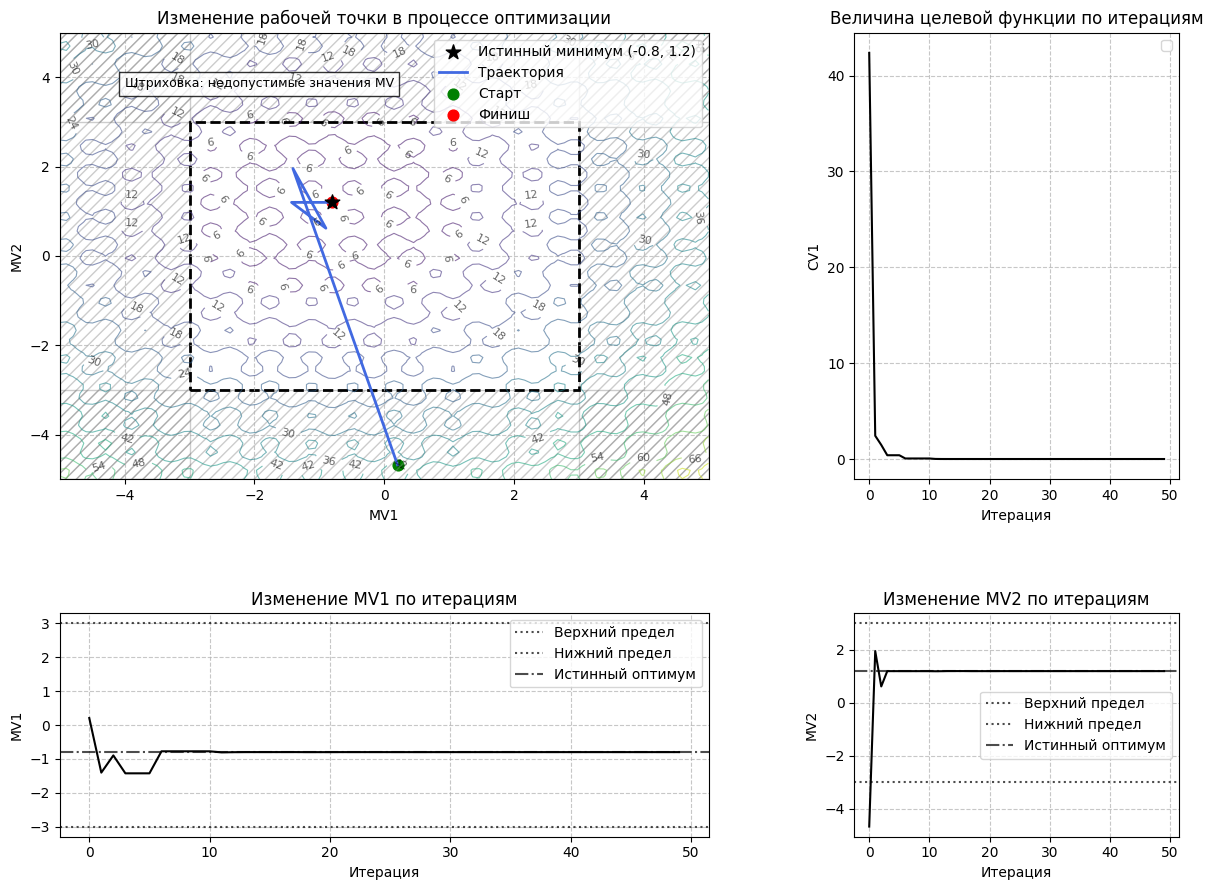

In [33]:

# Создание фигуры с несколькими субплогами
fig = plt.figure(figsize=(12, 9))

# Настройка сетки графиков
gs = fig.add_gridspec(2, 2, width_ratios=[2, 1], height_ratios=[2, 1])

# 1. График траектории с линиями уровня
ax1 = fig.add_subplot(gs[0, 0])

# Создание сетки для линий уровня
x_range = np.linspace(-5, 5, 100)
y_range = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_range, y_range)

# Пример функции для линий уровня (можно заменить на свою)
Z = np.empty(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i, j] = model.evaluate([X[i,j], Y[i,j]])

# Рисование линий уровня
contour = ax1.contour(X, Y, Z, 
                     levels=12,
                     cmap='viridis',
                     linewidths=0.8,
                     alpha=0.6)

# Подписи линий уровня
ax1.clabel(contour, inline=True, fontsize=8, colors='k')

ax1.scatter(target[0], target[1], s=120, c='black', 
          edgecolor='black', marker='*', 
          label=f'Истинный минимум ({target[0]}, {target[1]})', zorder=5)

# Траектория движения
ax1.plot(x_hist[:, 0], x_hist[:, 1], c='royalblue', linewidth=2, label='Траектория')
ax1.scatter(x_hist[0, 0], x_hist[0, 1], c='green', s=60, label='Старт')
ax1.scatter(x_hist[-1, 0], x_hist[-1, 1], c='red', s=60, label='Финиш')

ax1.set_title('Изменение рабочей точки в процессе оптимизации')
ax1.set_xlabel('MV1', fontsize=10)
ax1.set_ylabel('MV2', fontsize=10)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend()

ax1.fill_betweenx(y_range, 3, 5, 
                hatch='///', edgecolor='gray', 
                facecolor='none', alpha=0.4, label='Недопустимая зона')
ax1.fill_betweenx(y_range, -5, -3, 
                hatch='///', edgecolor='gray', 
                facecolor='none', alpha=0.4)
ax1.fill_between(x_range, 3, 5, 
               hatch='///', edgecolor='gray', 
               facecolor='none', alpha=0.4)
ax1.fill_between(x_range, -5, -3, 
               hatch='///', edgecolor='gray', 
               facecolor='none', alpha=0.4)

ax1.add_patch(patches.Rectangle((-3, -3), 6, 6,
            linewidth=2, linestyle='--', edgecolor='black', 
            facecolor='none', label='Зона допустимых значений MV'))


# ax1.add_patch(patches.Circle((target[0], target[1]), 1,  hatch='///',
#             linewidth=2, linestyle='-.', edgecolor='black', 
#             facecolor='none', label='Зона допустимых значений CV'))

ax1.text(0.1, 0.9, 'Штриховка: недопустимые значения MV',
       transform=ax1.transAxes,
       fontsize=9,
       verticalalignment='top',
       bbox=dict(facecolor='white', alpha=0.8))

# Остальные графики без изменений
# 2. График дополнительной переменной (Z)
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(y_hist, c='black')
ax2.set_title('Величина целевой функции по итерациям', fontsize=12)
# ax2.axhline(1.0, color='black', linestyle=':', alpha=0.7, label='CV min')
ax2.set_xlabel('Итерация', fontsize=10)
ax2.set_ylabel('CV1', fontsize=10)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend()

# 3. Графики скорости по осям
ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(x_hist[:,0], c='black')
ax3.axhline(3.0, color='black', linestyle=':', alpha=0.7, label='Верхний предел')
ax3.axhline(-3.0, color='black', linestyle=':', alpha=0.7, label='Нижний предел')
ax3.axhline(target[0], color='black', linestyle='-.', alpha=0.7, label='Истинный оптимум')
ax3.set_title('Изменение MV1 по итерациям', fontsize=12)
ax3.set_xlabel('Итерация', fontsize=10)
ax3.set_ylabel('MV1', fontsize=10)
ax3.grid(True, linestyle='--', alpha=0.7)
ax3.legend()

ax4 = fig.add_subplot(gs[1, 1])
ax4.plot(x_hist[:,1], c='black')
ax4.axhline(3.0, color='black', linestyle=':', alpha=0.7, label='Верхний предел')
ax4.axhline(-3.0, color='black', linestyle=':', alpha=0.7, label='Нижний предел')
ax4.axhline(target[1], color='black', linestyle='-.', alpha=0.7, label='Истинный оптимум')
ax4.set_title('Изменение MV2 по итерациям', fontsize=12)
ax4.set_xlabel('Итерация', fontsize=10)
ax4.set_ylabel('MV2', fontsize=10)
ax4.grid(True, linestyle='--', alpha=0.7)
ax4.legend()

# Регулировка отступов
plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

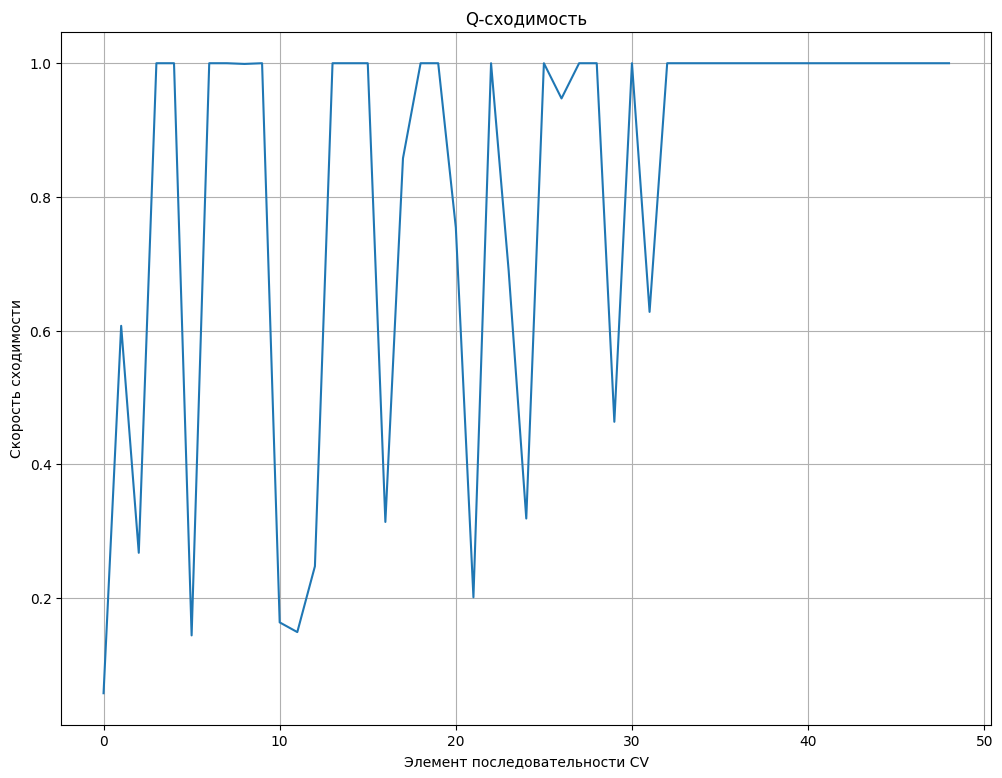

In [34]:
Q_conv1 = np.empty(len(y_hist)-1)
for i in range(len(Q_conv1)):
    Q_conv1[i] = np.abs(y_hist[i+1, 0] - 0)/np.abs(y_hist[i, 0] - 0)

fig2 = plt.figure(figsize=(12, 9))
plt.plot(Q_conv1)
plt.title('Q-сходимость')
plt.xlabel('Элемент последовательности CV')
plt.ylabel('Скорость сходимости')
plt.grid()
plt.show()

In [35]:
num = 100
x_stat_RBF = np.empty([num, 2])
y_stat_RBF = np.empty([num, 1])
L1_stat_RBF = np.empty([num, 1])

for i in range(num):

    target = np.array([random.uniform(-3, 3), random.uniform(-3, 3)])
    model = SquareSumModel(-target) 
    
    optimizer_RBF_stat = Optimizer(
                optCls=EvolutionaryOpt,
                seed=i,
                to_model_vec_size=2,
                from_model_vec_size=3,
                iter_limit=60,
                external_model=model.evaluate,
                dimension=2,
                population_size=30,
                offspring_per_parent=2,
                mutation_prob=0.3,
                sigma_init=0.2
            )
    
    for j in range(2):  # Первые 3 параметра - непрерывные
        optimizer_RBF_stat.setVecItemLimit(j, "to_model", min=-3, max=3)
    
    
    optimizer_RBF_stat.modelOptimize()
    ep_optimizer = optimizer_RBF_stat.getOptimizer()
    history = ep_optimizer.get_optimization_history()
    x_stat_RBF[i, :] = history[-1]['best_solution'].copy()
    y_stat_RBF[i, :] = model.evaluate(history[-1]['best_solution']).copy() + 0.0
    L1_stat_RBF[i, :] = np.sum(np.abs(history[-1]['best_solution'].copy() - target.copy()))

    print(f'Done {i+1} out of {num}', end='\r')


In [36]:
num = 100
x_stat_GAUSS = np.empty([num, 2])
y_stat_GAUSS = np.empty([num, 1])
L1_stat_GAUSS = np.empty([num, 1])

for i in range(num):

    target = np.array([random.uniform(-3, 3), random.uniform(-3, 3)])
    model = SquareSumModel(-target)   
    
    optimizer = Optimizer(
        optCls              = GaussOpt,
        seed                = i, # TODO: Проверить, точно ли работает. Сейчас выдаёт разные значения при одном seed
        to_model_vec_size   = 2,
        from_model_vec_size = 1,
        iter_limit          = 100,
        external_model = model.evaluate,
        target = None,
        )
    
    # optimizer.configure(kernel_cfg=('RBF', {}))
    for j in range(2):  # Первые 3 параметра - непрерывные
        optimizer.setVecItemLimit(j, "to_model", min=-3, max=3)

    optimizer.modelOptimize()
    x = optimizer.getResult()
    x_stat_GAUSS[i, :] =x.copy()
    y_stat_GAUSS[i, :] = model.evaluate(x).copy() + 0.0
    L1_stat_GAUSS[i, :] = np.sum(np.abs(x.copy() - target.copy()))


    print(f'Done {i+1} out of {num}', end='\r')


In [37]:
num = 100
x_stat_SA = np.empty([num, 2])
y_stat_SA = np.empty([num, 1])
L1_stat_SA = np.empty([num, 1])

for i in range(num):

    target = np.array([random.uniform(-3, 3), random.uniform(-3, 3)])
    model = SquareSumModel(-target)
    
    optimizer = Optimizer(
        optCls=SimulatedAnnealingOptimizer,
        seed=1424+i,
        to_model_vec_size=2,
        from_model_vec_size=1,
        iter_limit=1000,  # Уменьшил для более компактного вывода
        external_model=model.evaluate,
        initial_temp=50.0,
        min_temp=1e-5,
        cooling_rate=0.98,
        step_size=0.8,
        penalty_coef=1e6  
    )

    for j in range(2):  # Первые 3 параметра - непрерывные
        optimizer.setVecItemLimit(j, "to_model", min=-3, max=3)
    
    optimizer.modelOptimize()    
    x = optimizer.getResult()
    x_stat_SA[i, :] =x.copy()
    y_stat_SA[i, :] = model.evaluate(x).copy() + 0.0
    L1_stat_SA[i, :] = np.sum(np.abs(x.copy() - target.copy()))

    print(f'Done {i+1} out of {num}', end='\r')


In [38]:
num = 100
x_stat_GA = np.empty([num, 2])
y_stat_GA = np.empty([num, 1])
L1_stat_GA = np.empty([num, 1])

for i in range(num):

    target = np.array([random.uniform(-3, 3), random.uniform(-3, 3)])
    model = SquareSumModel(-target)  
    
    optimizer_GA_stat = Optimizer(
            optCls=Genetic_Algo,
            seed=i+1,
            to_model_vec_size=2,
            from_model_vec_size=1,  # SquareSumModel возвращает только ошибку
            iter_limit=50,
            external_model=model.evaluate,  # Используем адаптер
            # Параметры для EvolutionaryOpt
            population_size = 100,
            init_mutation = 0.5,
            min_mutation = 0.05,
            elite_size = 5
        )
    
    for j in range(2):  # Первые 3 параметра - непрерывные
        optimizer_GA_stat.setVecItemLimit(j, "to_model", min=-3, max=3)
    
    
    optimizer_GA_stat.modelOptimize()
    ep_optimizer = optimizer_GA_stat.getOptimizer()
    history = ep_optimizer.get_optimization_history().copy()
    x_stat_GA[i, :] = history[-1]['best_solutions'].copy()
    y_stat_GA[i, :] = model.evaluate(history[-1]['best_solutions']).copy()
    L1_stat_GA[i, :] = np.sum(np.abs(history[-1]['best_solutions'].copy() - target.copy()))

    print(f'Done {i+1} out of {num}', end='\r')

In [39]:
history

[{'generation': 0,
  'best_solutions': array([-1.01967714, -0.30115752]),
  'best_fitness': 2.2834515812052807,
  'average_fitness': 606.1353784542276,
  'mutation_rate': 0.5,
  'valid_solutions': 100},
 {'generation': 1,
  'best_solutions': array([-1.93338976, -1.11442258]),
  'best_fitness': 0.15605520129692896,
  'average_fitness': 11.018815168144434,
  'mutation_rate': 0.477496293010718,
  'valid_solutions': 100},
 {'generation': 2,
  'best_solutions': array([-1.93338976, -1.28082662]),
  'best_fitness': 0.05228980109789459,
  'average_fitness': 4.760636270256627,
  'mutation_rate': 0.4560054196779549,
  'valid_solutions': 100},
 {'generation': 3,
  'best_solutions': array([-1.93701568, -1.31693666]),
  'best_fitness': 0.03714341084701055,
  'average_fitness': 3.597361881982967,
  'mutation_rate': 0.4354817949780403,
  'valid_solutions': 100},
 {'generation': 4,
  'best_solutions': array([-1.97989694, -1.58355329]),
  'best_fitness': 0.008275353550076546,
  'average_fitness': 2.213

In [40]:
def plot_confidence_interval(x, values, z=1.96, color='black', horizontal_line_width=0.25):
    mean = statistics.mean(values)
    stdev = statistics.stdev(values)
    confidence_interval = z * stdev / sqrt(len(values))

    left = x - horizontal_line_width / 2
    top = mean - confidence_interval
    right = x + horizontal_line_width / 2
    bottom = mean + confidence_interval
    plt.plot([x, x], [top, bottom], color=color, linewidth=3)
    plt.plot([left, right], [top, top], color=color, linewidth=3)
    plt.plot([left, right], [bottom, bottom], color=color, linewidth=3)
    plt.plot(x, mean, 'o', color='#f44336')

    print(top, mean, bottom)
    print(20*'=')

    return mean, confidence_interval


2.3644232663691286e-07 3.989861849646179e-06 7.743281372655446e-06
2.611220483891061e-07 3.9470237987740867e-07 5.282827113657113e-07
1.3775618841321843e-05 1.6980545391222364e-05 2.0185471941122884e-05
7.98560574548671e-07 1.2112025887675688e-06 1.6238446029864667e-06


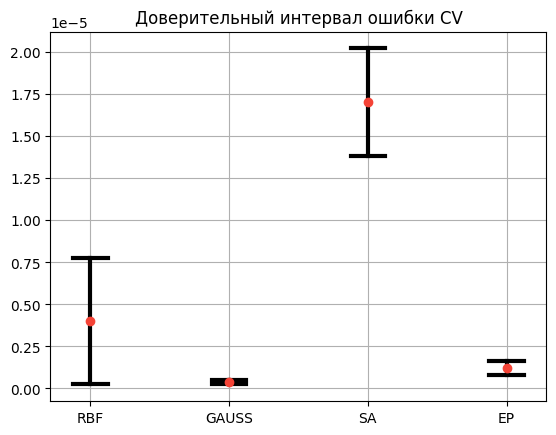

In [41]:
plt.xticks([1, 2, 3, 4], ['RBF', 'GAUSS', 'SA', 'GA'])
plt.title('Доверительный интервал ошибки CV')
plot_confidence_interval(1, y_stat_RBF[:, 0])
plot_confidence_interval(2, y_stat_GAUSS[:, 0])
plot_confidence_interval(3, y_stat_SA[:, 0])
plot_confidence_interval(4, y_stat_GA[:, 0])
plt.grid()
plt.show()

0.0009704154005139414 0.0013264456189603898 0.001682475837406838
0.0005523312990694693 0.0006530968336458391 0.000753862368222209
0.004227362576188887 0.004693898362847737 0.005160434149506588
0.0009382252838680168 0.00110113409756918 0.0012640429112703434


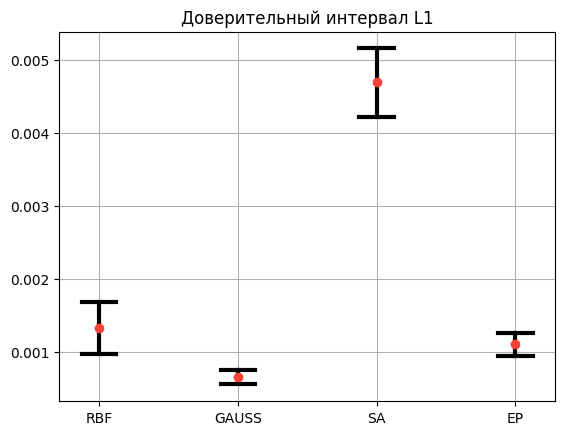

In [42]:
plt.xticks([1, 2, 3, 4], ['RBF', 'GAUSS', 'SA', 'GA'])
plt.title('Доверительный интервал L1')
plot_confidence_interval(1, L1_stat_RBF[:, 0])
plot_confidence_interval(2, L1_stat_GAUSS[:, 0])
plot_confidence_interval(3, L1_stat_SA[:, 0])
plot_confidence_interval(4, L1_stat_GA[:, 0])
plt.grid()
plt.show()